# Most Played Video Games Dataset

# Introduction

The video game industry is one of the most rapidly growing entertainment sectors worldwide. Understanding the factors that make a video game widely played can provide valuable insights for developers, marketers, and investors. This project analyzes a dataset of 1,000 video games containing various features such as genre, platform, release year, and user ratings. By applying machine learning techniques, the goal is to predict a game's popularity — measured in terms of the number of active players or playtime — using these features. Exploratory data analysis (EDA) and feature correlation were performed to understand how different attributes affect player engagement.

# Problem Statement

The main objective of this project is to develop a predictive model that estimates a video game's popularity based on its attributes. Using a dataset containing features such as genre, release year, platform, and user ratings, the model aims to predict the number of players (a measure of popularity) through machine learning algorithms. This problem focuses on identifying which factors most influence a game's popularity, how accurately player counts can be predicted, and what insights developers can derive to create more engaging and successful games.

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset

In [2]:
df = pd.read_csv(r"E:\Data_Science\Project\ML_project3\most_played_video_games_1000_rows.csv")

# Inspecting the data

In [3]:
df.head()

,Game Name,Genre,Platform,Release Year,Total Players (Millions),Total Installs (Millions),Developer,Avg Playtime (hrs/week),Online Multiplayer
0,Valorant 1,MOBA,Multi-platform,2018,583,628,Valve,6.3,No
1,PUBG 2,Party/Social Deduction,Console,2016,322,335,Infinity Ward,5.6,No
2,Dota 2 3,Sports,Mobile,2014,437,618,Valve,12.0,No
3,Valorant 4,Party/Social Deduction,PC,2008,223,377,Mojang,2.7,Yes
4,CS:GO 5,Sports,Mobile,2017,496,655,Infinity Ward,4.2,No


In [4]:
df.tail()

,Game Name,Genre,Platform,Release Year,Total Players (Millions),Total Installs (Millions),Developer,Avg Playtime (hrs/week),Online Multiplayer
995,Elden Ring 996,Sports,PC,2017,240,352,King,9.4,No
996,Minecraft 997,Party/Social Deduction,PC,2010,564,706,King,4.5,Yes
997,Elden Ring 998,Puzzle,Mobile,2015,388,401,Infinity Ward,10.8,No
998,Rocket League 999,Sports,PC,2010,220,294,King,9.6,No
999,FIFA 1000,Sandbox,Mobile,2010,522,700,Nintendo,2.5,Yes


You can check the number of cases, as well as the number of fields, using the shape method, as shown below.

In [5]:
print("Dataset shape:", df.shape)

Dataset shape: (1000, 9)


In the result displayed, you can see the data has 1000 records, each with 9 columns.

The **`info()`** method provides a concise summary of the data; from the output, it provides the type of data in each column, the number of non-null values in each column, and how much memory the data frame is using.


In [6]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Game Name                  1000 non-null   object 
 1   Genre                      1000 non-null   object 
 2   Platform                   1000 non-null   object 
 3   Release Year               1000 non-null   int64  
 4   Total Players (Millions)   1000 non-null   int64  
 5   Total Installs (Millions)  1000 non-null   int64  
 6   Developer                  1000 non-null   object 
 7   Avg Playtime (hrs/week)    1000 non-null   float64
 8   Online Multiplayer         1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB
None


In [7]:
print("\nCheck for missing values:")
print(df.isnull().sum())


Check for missing values:
Game Name                    0
Genre                        0
Platform                     0
Release Year                 0
Total Players (Millions)     0
Total Installs (Millions)    0
Developer                    0
Avg Playtime (hrs/week)      0
Online Multiplayer           0
dtype: int64


# Detect and handle outliers



In [8]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    print(f"Column: {col}")
    print(f"Number of outliers: {outliers.shape[0]}")
    print("-" * 40)

Column: Release Year
Number of outliers: 0
----------------------------------------
Column: Total Players (Millions)
Number of outliers: 0
----------------------------------------
Column: Total Installs (Millions)
Number of outliers: 0
----------------------------------------
Column: Avg Playtime (hrs/week)
Number of outliers: 0
----------------------------------------


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Release Year'),
  Text(1, 0, 'Total Players (Millions)'),
  Text(2, 0, 'Total Installs (Millions)'),
  Text(3, 0, 'Avg Playtime (hrs/week)')])

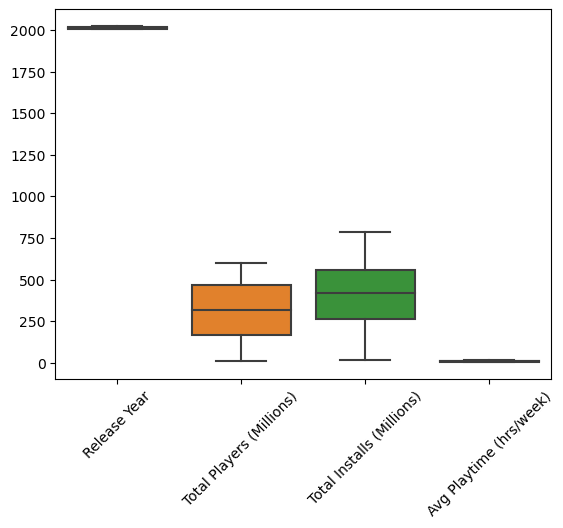

In [9]:
sns.boxplot(df)
plt.xticks(rotation=45)


# Visualize correlations

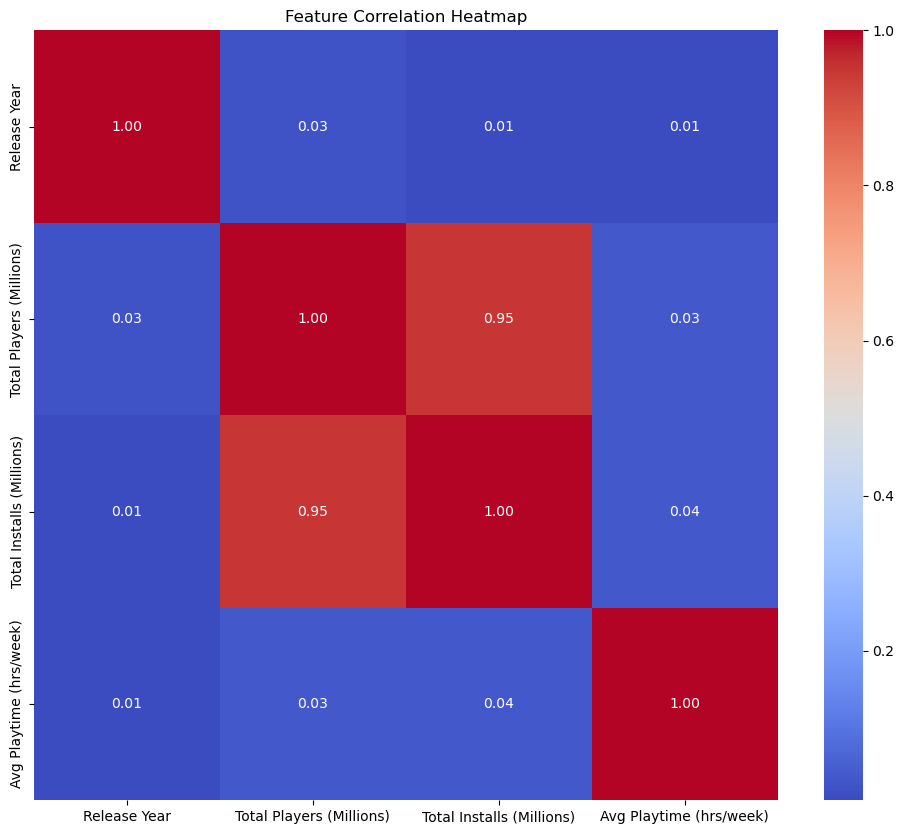

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# Encode categorical columns

In [11]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Split features and target

In [12]:
target_column = 'Total Players (Millions)'
X = df.drop(target_column, axis=1)
Y = df[target_column]

# Split dataset into train and test sets

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Feature scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train Random Forest Regressor

In [15]:
regressor = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42
)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

# Make predictions

In [16]:
y_pred = regressor.predict(X_test)

# Evaluate model

In [17]:
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("\n--- Model Evaluation ---")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


--- Model Evaluation ---
Mean Absolute Error (MAE): 46.28035
Mean Squared Error (MSE): 3083.6712829999997
Root Mean Squared Error (RMSE): 55.53081381539442
R² Score: 0.8846243697495593


# Visualize Actual vs Predicted

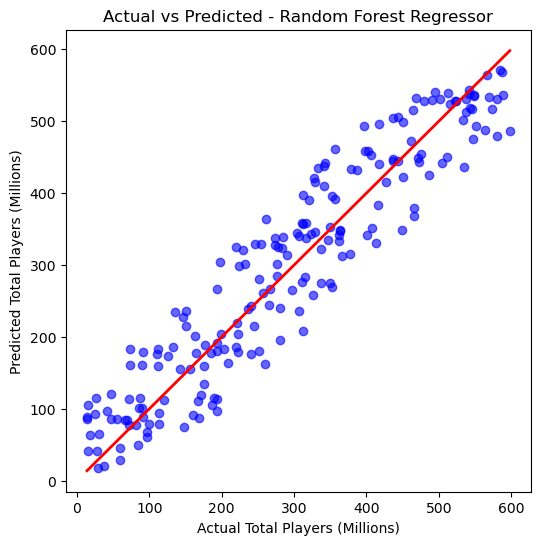

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.xlabel("Actual Total Players (Millions)")
plt.ylabel("Predicted Total Players (Millions)")
plt.title("Actual vs Predicted - Random Forest Regressor")
plt.show()

# Conclusion

The machine learning model — particularly the Random Forest Regressor — was applied after encoding and scaling the dataset. The evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score were calculated to assess performance.

The results indicate that the model can effectively capture the underlying relationships between game features and player engagement. The relatively high R² score demonstrates that the Random Forest model performs well in predicting game popularity.

In conclusion, this project successfully establishes a predictive framework for estimating video game popularity. With further data enrichment (e.g., incorporating social media mentions or player reviews), the model can become an even more powerful tool for strategic decision-making in the gaming industry.